In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(xtrain, ytrain),(xtest, ytest)= mnist.load_data()

In [3]:
import numpy as np

In [4]:
xtrain = np.expand_dims(xtrain, -1)

In [5]:
xtest = np.expand_dims(xtest, -1)

In [6]:
xtrain = xtrain/255

In [7]:
xtest = xtest/255

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.layers import Dense, Input, Conv2D

In [10]:
from tensorflow.keras.models import Model

In [11]:
from tensorflow.keras.layers import Flatten

In [12]:
k = len(set(ytest))

In [13]:
i = Input(shape = xtrain[0].shape)
x= Conv2D(32, (3,3), strides=2 , activation='relu')(i)
x= Conv2D(64, (3,3), strides=2 , activation='relu')(x)
x= Conv2D(128, (3,3), strides=2 , activation='relu')(x)
x = Flatten()(x)
x= Dense (512, activation = 'relu')(x)
x = Dense (k, activation='softmax')(x)

In [14]:
model= Model(i,x)

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1597 - accuracy: 0.9515 - val_loss: 0.0628 - val_accuracy: 0.9799
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0488 - val_accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0441 - val_accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0483 - val_accuracy: 0.9860


In [17]:
import matplotlib.pyplot as plt

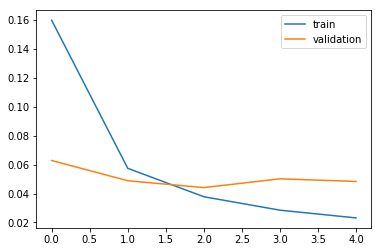

In [20]:
plt.plot(r.history['loss'], label = 'train')
plt.plot(r.history['val_loss'], label= 'validation')
plt.legend()

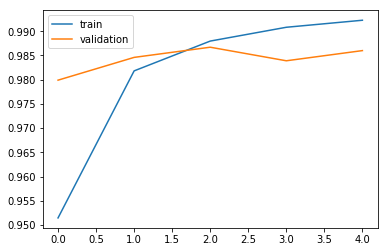

In [21]:
plt.plot(r.history['accuracy'], label = 'train')
plt.plot(r.history['val_accuracy'], label = 'validation')
plt.legend()

In [22]:
pp = model.predict(xtest)

313/313 [==============================] - 2s 6ms/step


In [23]:
pp[0]

array([5.1039462e-10, 3.0010174e-09, 7.2427821e-07, 1.4330749e-07,
       8.7062535e-09, 2.2823747e-09, 3.0543597e-12, 9.9999893e-01,
       5.1422899e-10, 2.9259243e-07], dtype=float32)

In [25]:
pp.shape

(10000, 10)

In [27]:
ppp=[]
for i  in range(10000):
    x = pp[i,:].argmax()
    ppp.append(x)

In [28]:
ppp[0]

7

In [30]:
ytest[0]

7

In [50]:
x=np.random.randint(10000)
y1=ppp[x]
y2=ytest[x]
print(y1)
print(y2)

7
7
